In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv(r'D:\chrome_Download\default.csv')

In [63]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [64]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [65]:
df.head(100)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
95,No,No,820.017113,51584.657318
96,No,Yes,619.751869,15750.622083
97,No,No,1047.718124,46416.970994
98,No,No,243.841328,47193.888131


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
default    10000 non-null object
student    10000 non-null object
balance    10000 non-null float64
income     10000 non-null float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [67]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [68]:
df.student.eq('yes').mul(1)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: student, Length: 10000, dtype: int32

In [69]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [70]:
df.student.replace('Yes',1,inplace= True)
df.student.replace('No',0,inplace= True)

In [71]:
df.head()

,default,student,balance,income
0,No,0,729.526495,44361.625074
1,No,1,817.180407,12106.134700
2,No,0,1073.549164,31767.138947
3,No,0,529.250605,35704.493935
4,No,0,785.655883,38463.495879


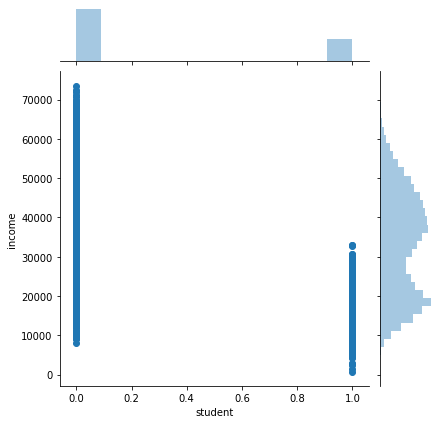

In [72]:
sns.jointplot(y = 'income', x= 'student',data = df)

(array([7056.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0., 2944.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

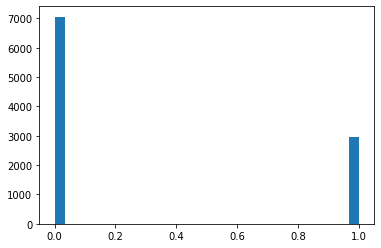

In [75]:
plt.hist(x = 'student',data = df,bins = 30)

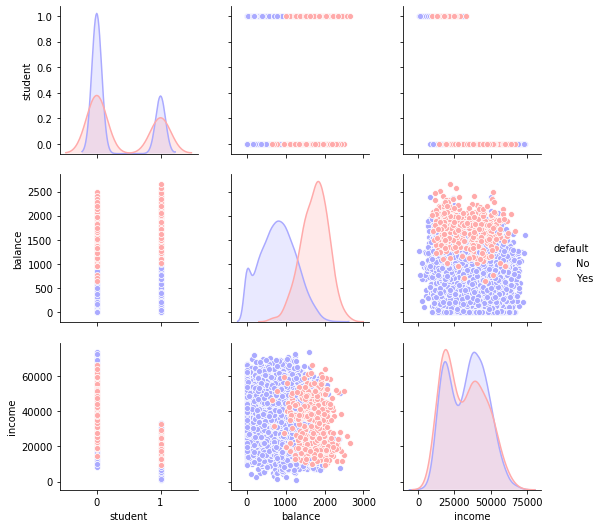

In [79]:
sns.pairplot(data = df,hue = 'default',palette= 'bwr')

In [93]:
#afte applying standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [133]:
scaler.fit(df[['income','student']])
scaled_features = scaler.transform(df[['income','student']])
df_feat = pd.DataFrame(scaled_features,columns = df.columns[2:])
df_feat.head()

,balance,income
0,0.813187,-0.645936
1,-1.605496,1.548141
2,-0.131212,-0.645936
3,0.164031,-0.645936
4,0.370915,-0.645936


In [135]:
from sklearn.model_selection import train_test_split
X = df_feat[['income','balance']]
y = df['student']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
lr = LogisticRegression(solver='liblinear')

In [138]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
predictions = lr.predict(X_test)

In [143]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2111
           1       1.00      1.00      1.00       889

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [144]:
print(confusion_matrix(y_test,predictions))

[[2111    0]
 [   0  889]]


In [145]:
#without applying standard scaler

In [146]:
from sklearn.model_selection import train_test_split
X = df[['income','balance']]
y = df['student']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [147]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')

In [148]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
predictions = lr.predict(X_test)

In [150]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2111
           1       0.84      0.58      0.68       889

    accuracy                           0.84      3000
   macro avg       0.84      0.77      0.79      3000
weighted avg       0.84      0.84      0.83      3000



In [151]:
print(confusion_matrix(y_test,predictions))

[[2013   98]
 [ 376  513]]
